In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#returns shortfall percentage 
def count_shortfalls(data):
    sf_count = 0
    for i in range(data.shape[0]):
        if data[i] > 10:
            sf_count = sf_count + 1
    sf_count = sf_count / data.shape[0]
    return sf_count

In [9]:
batch_num = 12
sample_num = 1000

In [25]:
original_data = (np.genfromtxt("batchs/austin_test_calls_v4.csv", delimiter=","))
original_data_s = (np.genfromtxt("batchs/austin_test_calls_v4.csv", delimiter=",", dtype = str))

In [33]:
original_data_s[0:10,3]

array(['transport_time', '325', '847', '367', '262', '491', '410', '707',
       '133', '118'], dtype='<U24')

In [105]:
robust = np.zeros([sample_num,batch_num])
for i in range(1,13):
    filename = "batchs/Robust0140calls1000batch" + str(i)  + ".csv"
    #print(filename)
    robust_temp = (np.genfromtxt(filename, delimiter=","))
    robust[:,i-1] = robust_temp

stochastic = np.zeros([sample_num,batch_num])
for i in range(1,13):
    filename = "batchs/Stochastic40calls1000batch" + str(i)  + ".csv"
    #print(filename)
    stochastic_temp = (np.genfromtxt(filename, delimiter=","))
    stochastic[:,i-1] = stochastic_temp
    
reported = np.zeros([sample_num,batch_num])
for i in range(1,13):
    reported_temp = original_data[(i-1)*1000 + 1: i*1000 + 1,3]
    print(np.mean(reported_temp))
    reported[:,i-1] = reported_temp / 60

481.267
505.051
438.335
512.342
443.088
467.965
450.698
436.588
473.431
423.851
445.36
449.692


In [53]:
print(np.mean(reported))
print(np.mean(robust))
print(np.mean(stochastic))

7.677316666666666
6.783399999999999
6.210030555555556


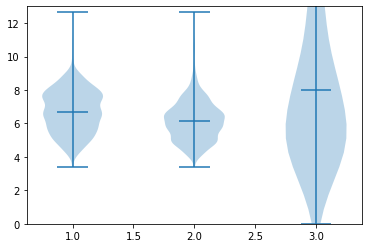

In [79]:
for i in range(1,2):
    plt.violinplot([robust[:,i-1],stochastic[:,i-1], reported[:,i-1]],showmeans=True)
    plt.ylim([0,13])

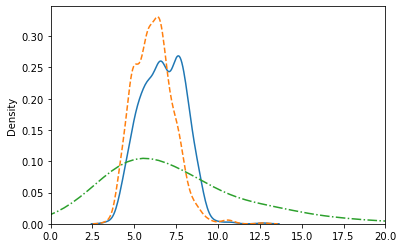

In [107]:
for i in range(1,2):
    sns.kdeplot(robust[:,i-1])
    sns.kdeplot(stochastic[:,i-1],  linestyle="--")
    sns.kdeplot(reported[:,i-1],  linestyle="-.")
    plt.xlim([0,20])

In [112]:
np.min(robust)

3.1166666666666667

In [109]:
means = np.zeros([3,12])
for i in range(0,12):
#     print(count_shortfalls(reported[:,0]))
#     print(count_shortfalls(stochastic[:,0]))
#     print(count_shortfalls(robust[:,0]))
    means[0,i] = np.mean(reported[:,i])
    means[1,i] = np.mean(stochastic[:,i])
    means[2,i] = np.mean(robust[:,i])
    print(str(round(means[0,i],3)) + " & " + str(round(means[1,i],3)) + " & " +str(round(means[2,i],3)))
#     print(np.mean(reported[:,i]))
#     print(np.mean(stochastic[:,i]))
#     print(np.mean(robust[:,i]))
print(np.mean(means[0,:]))
print(np.mean(means[1,:]))
print(np.mean(means[2,:]))
print(np.std(means[0,:]))
print(np.std(means[1,:]))
print(np.std(means[2,:]))
means

8.021 & 6.145 & 6.706
8.418 & 6.22 & 6.747
7.306 & 6.224 & 6.76
8.539 & 6.239 & 6.81
7.385 & 6.185 & 6.769
7.799 & 6.2 & 6.831
7.512 & 6.24 & 6.787
7.276 & 6.134 & 6.71
7.891 & 6.264 & 6.856
7.064 & 6.231 & 6.893
7.423 & 6.229 & 6.704
7.495 & 6.21 & 6.828
7.677316666666667
6.210030555555556
6.7834
0.4429976687193065
0.03708884842468334
0.05915332830872647


array([[8.02111667, 8.41751667, 7.30558333, 8.53903333, 7.3848    ,
        7.79941667, 7.51163333, 7.27646667, 7.89051667, 7.06418333,
        7.42266667, 7.49486667],
       [6.14476667, 6.2201    , 6.22391667, 6.23883333, 6.18518333,
        6.20046667, 6.23961667, 6.13363333, 6.26378333, 6.231     ,
        6.22936667, 6.2097    ],
       [6.70591667, 6.74715   , 6.75993333, 6.8095    , 6.76858333,
        6.83113333, 6.78718333, 6.71001667, 6.85613333, 6.89273333,
        6.70416667, 6.82835   ]])